# **Introducción al Análisis Exploratorio de Datos.**


![image](https://static.vecteezy.com/system/resources/previews/003/206/623/original/youtube-editorial-app-icon-free-vector.jpg)

YouTube is an American online video sharing and social media platform headquartered in San Bruno, California.

It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. Owned by Google, it is the second most visited website,
right after Google itself.

YouTube has more than one billion monthly users who collectively watch more than one billion hours of videos each day.
As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.

# Database

https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

Welcome to the captivating realm of YouTube stardom, where this meticulously curated dataset unveils the statistics of the most subscribed YouTube channels. A collection of YouTube giants, this dataset offers a perfect avenue to analyze and gain valuable insights from the luminaries of the platform. With comprehensive details on top creators' subscriber counts, video views, upload frequency, country of origin, earnings, and more, this treasure trove of information is a must-explore for aspiring content creators, data enthusiasts, and anyone intrigued by the ever-evolving online content landscape. Immerse yourself in the world of YouTube success and unlock a wealth of knowledge with this extraordinary dataset.




In [70]:
# data
import pandas as pd
import numpy as np


#For Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from math import pi
from wordcloud import WordCloud


#Set Option
pd.set_option("display.max_columns",None)
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

color_scheme = px.colors.sequential.Peach

### **Load Data**

In [71]:
df = pd.read_csv('GlobalYouTubeStatistics.csv', encoding='iso-8859-1')

## **Understanding Data**

### **Show DataFrame**

In [72]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


### **Column Names**

In [73]:
list(df.columns)

['rank',
 'Youtuber',
 'subscribers',
 'video views',
 'category',
 'Title',
 'uploads',
 'Country',
 'Abbreviation',
 'channel_type',
 'video_views_rank',
 'country_rank',
 'channel_type_rank',
 'video_views_for_the_last_30_days',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings',
 'subscribers_for_last_30_days',
 'created_year',
 'created_month',
 'created_date',
 'Gross tertiary education enrollment (%)',
 'Population',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

<details>

**<summary>Key Features</summary>**


*   rank: Position of the YouTube channel based on the number of subscribers
*   Youtuber: Name of the YouTube channel
*   subscribers: Number of subscribers to the channel
*   video views: Total views across all videos on the channel
*   category: Category or niche of the channel
*   Title: Title of the YouTube channel
*   uploads: Total number of videos uploaded on the channel
*   Country: Country where the YouTube channel originates
*   Abbreviation: Abbreviation of the country
*   channel_type: Type of the YouTube channel (e.g., individual, brand)
*   video_views_rank: Ranking of the channel based on total video views
*   country_rank: Ranking of the channel based on the number of subscribers within its country
*   channel_type_rank: Ranking of the channel based on its type (individual or brand)
*   video_views_for_the_last_30_days: Total video views in the last 30 days
*   lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
*   highest_monthly_earnings: Highest estimated monthly earnings from the channel
*   lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
*   highest_yearly_earnings: Highest estimated yearly earnings from the channel
*   subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
*   created_year: Year when the YouTube channel was created
*   created_month: Month when the YouTube channel was created
*   created_date: Exact date of the YouTube channel's creation
*   Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
*   Population: Total population of the country
*   Unemployment rate: Unemployment rate in the country
*   Urban_population: Percentage of the population living in urban areas
*   Latitude: Latitude coordinate of the country's location
*   Longitude: Longitude coordinate of the country's location

In [74]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [110]:
Drop_Columns = ['Title','Abbreviation','channel_type','Latitude',
                'Longitude','created_month','channel_type_rank',
                'highest_monthly_earnings','lowest_monthly_earnings','created_date']

df.drop(Drop_Columns,axis=1,inplace=True)

df.head(5)

KeyError: ignored

In [111]:
# Total Count of NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame :\n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame :

 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
uploads                                      0
Country                                    122
video_views_rank                             1
country_rank                               116
video_views_for_the_last_30_days            56
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_date                                 5
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment rate                          123
Urban_population                           123
dtype: int64


In [147]:
categorical = df['category'].dropna()
youtube= pd.merge(df, categorical)

In [112]:
set(youtube['category'])

{'Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Movies',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Trailers',
 'Travel & Events',
 nan}

In [113]:
youtube['category'].value_counts().index

Index(['Entertainment', 'Music', 'People & Blogs', 'Gaming', 'Comedy',
       'Film & Animation', 'Education', 'Howto & Style', 'News & Politics',
       'Science & Technology', 'Shows', 'Sports', 'Pets & Animals', 'Trailers',
       'Nonprofits & Activism', 'Movies', 'Autos & Vehicles',
       'Travel & Events'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'People & Blogs'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Film & Animation'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Howto & Style'),
  Text(8, 0, 'News & Politics'),
  Text(9, 0, 'Science & Technology'),
  Text(10, 0, 'Shows'),
  Text(11, 0, 'Sports'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Trailers'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Movies'),
  Text(16, 0, 'Autos & Vehicles'),
  Text(17, 0, 'Travel & Events')])

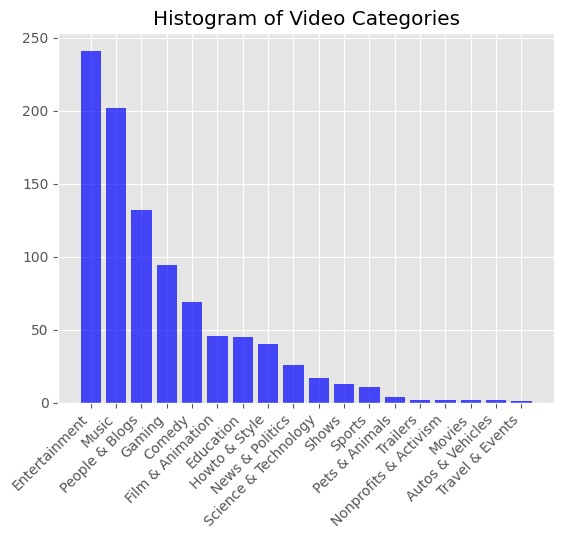

In [114]:
#df['category'].value_counts().plot(kind='bar',rot=45 )
#plt.xticks(rotation=45)
y = youtube['category'].value_counts()
x = youtube['category'].value_counts().index
fig, ax = plt.subplots()
plt.bar(x,y,color='blue',alpha=0.7)
plt.title('Histogram of Video Categories')
plt.xticks(rotation=45, ha='right')

In [115]:
category = youtube['category'].value_counts()
fig = px.pie(values=category.values,
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Blues)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12,
                  uniformtext_mode='hide',
                  template ='ggplot2')

fig.show()

### **False Account Detection**

In [116]:
youtube[youtube.uploads==0][['Youtuber','rank','video views']].sort_values(by='rank',ascending=False)

,Youtuber,rank,video views
985,TKOR,986,3.392023e+09
983,MoniLina,984,1.608681e+10
951,Ja Mill,952,1.302818e+09
877,Ei Nerd,878,3.568392e+09
853,Blockbuster Movies,854,2.650061e+09
777,Crazy Frog,778,7.946322e+09
762,Harry Styles,763,5.689224e+09
735,LEGENDA FUNK,736,2.440718e+09
710,Major Lazer Official,711,9.383431e+09
680,TheRichest,681,2.730879e+09


### A good indicator of False Youtube accounts would be uploadvideos and rank

In [149]:
youtube.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,video_views_for_the_last_30_days,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
count,136935.000000,1.369350e+05,1.369350e+05,136935.000000,1.367330e+05,120990.000000,1.294890e+05,1.369350e+05,1.369350e+05,8.691600e+04,136064.000000,136064.000000,119963.000000,1.199630e+05,119963.000000,1.199630e+05
mean,495.472334,2.274870e+07,1.163046e+10,7953.262117,5.565516e+05,383.151798,1.677579e+08,4.274254e+05,6.847598e+06,3.368480e+05,2012.382291,15.909587,63.530798,4.151772e+08,9.257335,2.186192e+08
std,285.403484,1.675583e+07,1.352914e+10,27712.738918,1.362252e+06,1198.267985,3.733560e+08,7.754087e+05,1.242965e+07,6.367196e+05,4.263444,8.750380,25.698600,4.629290e+08,4.895985,1.522544e+08
min,1.000000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04
25%,245.000000,1.450000e+07,4.712624e+09,168.000000,2.790000e+02,11.000000,2.026300e+07,3.160000e+04,5.063000e+05,1.000000e+05,2009.000000,9.000000,36.300000,6.962558e+07,4.690000,5.590832e+07
50%,498.000000,1.770000e+07,8.615619e+09,671.000000,8.010000e+02,50.000000,6.498900e+07,1.670000e+05,2.700000e+06,1.000000e+05,2013.000000,16.000000,67.000000,3.282395e+08,9.710000,2.706630e+08
75%,741.000000,2.480000e+07,1.469600e+10,2726.000000,3.094000e+03,123.000000,1.699680e+08,4.756000e+05,7.600000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,6.589000e+09,6.900000e+06,1.106000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08


# Descriptive Analysis

Check types of data of each column

Text(0.5, 1.0, 'Youtube Channel Counts Timeline')

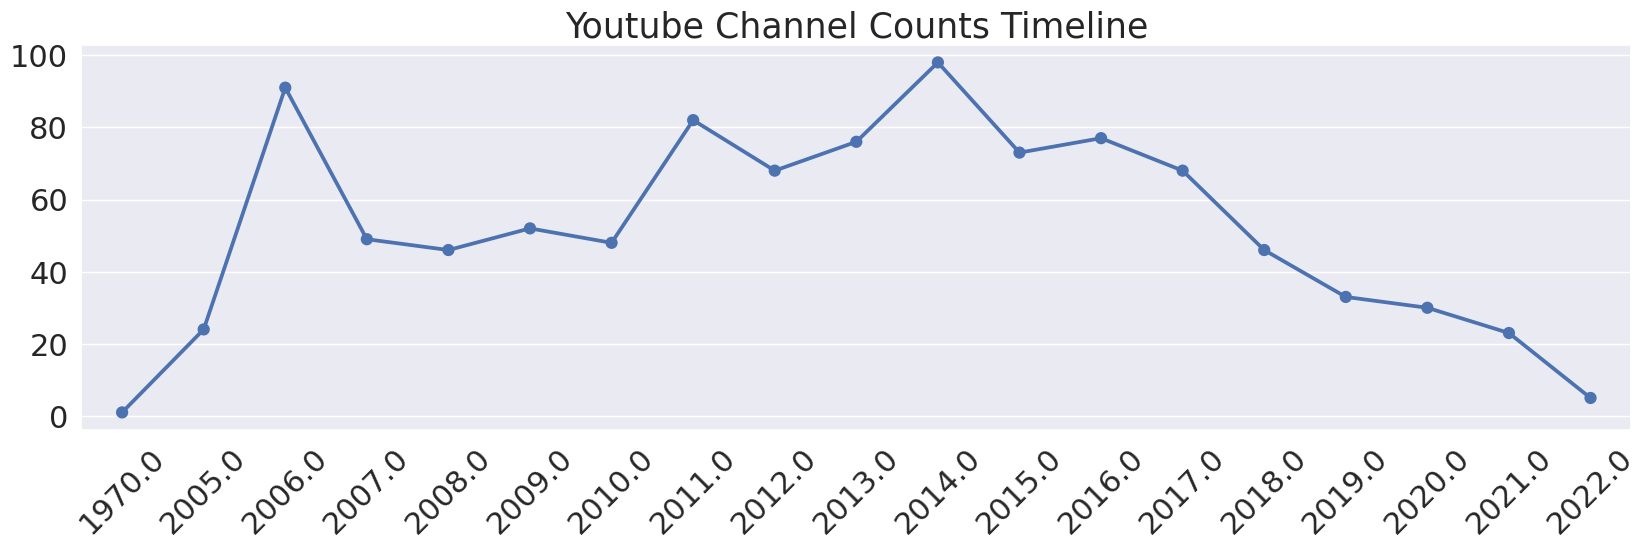

In [127]:
year = youtube['created_year'].value_counts()
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.set(font_scale=2)
sns.pointplot(x=year.index, y=year.values).set_title('Youtube Channel Counts Timeline',fontsize=25)

<ipython-input-136-ec6706c39138>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



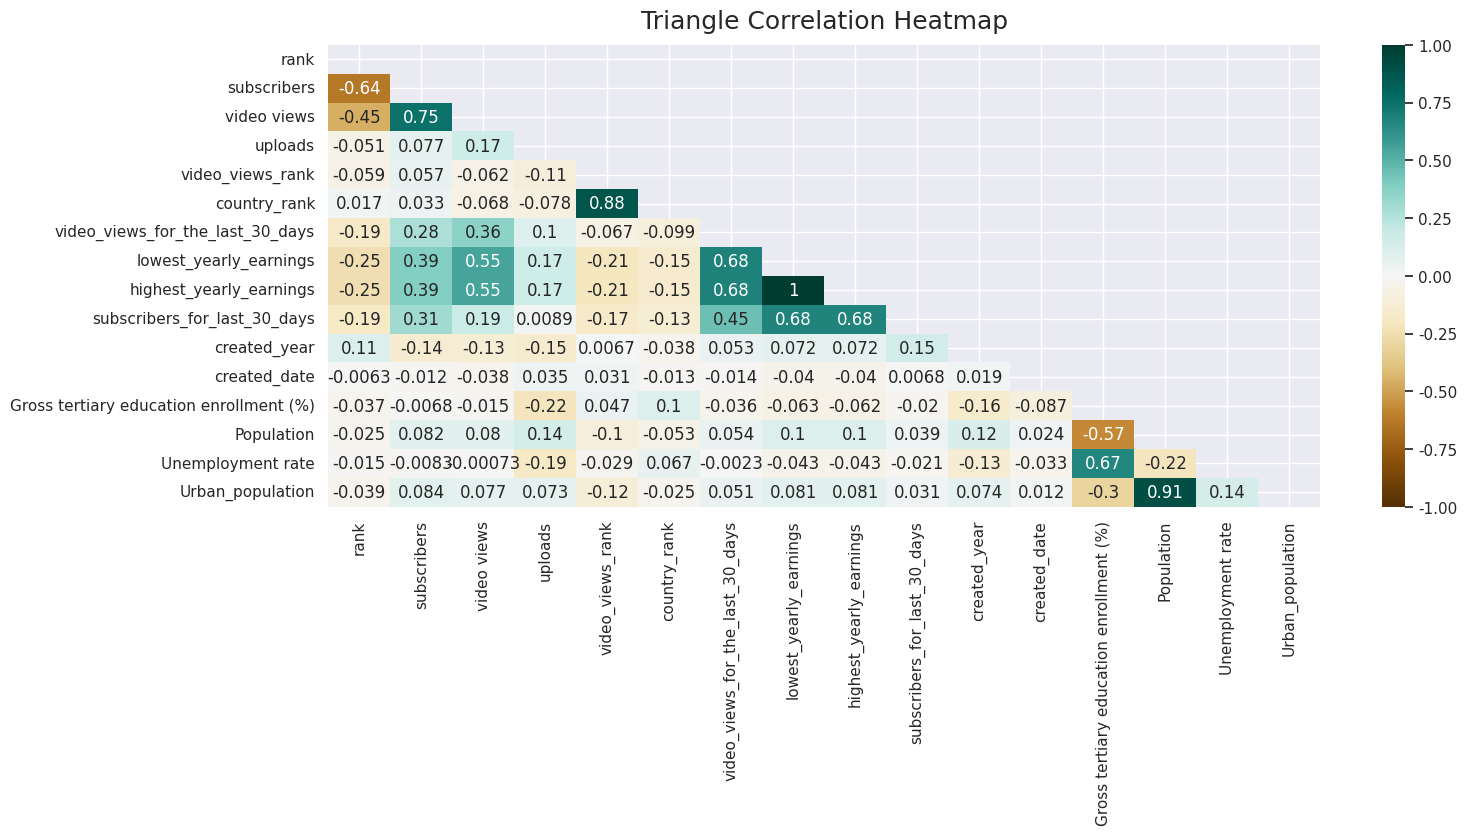

In [136]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(youtube.corr(numeric_only = True), dtype=np.bool))
heatmap = sns.heatmap(youtube.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# Exploratory Analysis

# Data Mining

In [ ]:
categories = youtube.groupby('category').mean().subscribers.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index,
                            y=categories.values,
                            color = categories.index,
                            color_discrete_sequence=color_scheme,
                            title='Mean Subscribers by Category',
                            template = 'ggplot2',
                            text = np.round(categories.values/1000000,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

In [137]:
def barplot(x, y, axs, palette, title):
    ax = sns.barplot(x = x, y = y, hue = x, palette = palette, dodge=False, ax=axs)
    for num in range(len(y)):
        ax.bar_label(ax.containers[num])
    ax.set_title(title)
    return ax

In [150]:
a = youtube.groupby(['category'])['subscribers'].max()

most = youtube[youtube['subscribers'].isin(a.values)]

# plt.figure(figsize=(10,5))
fig = px.treemap(most,
                 path=['category','Youtuber'],
                 values='subscribers',
                 title = ' Youtuber with most subscribers in each category',
                 color_discrete_sequence= color_scheme,
                 width=1000, height=500)
fig.update_layout(template = 'ggplot2')
fig.show()

In [153]:
a = youtube.groupby(['category'])['highest_yearly_earnings'].max()

most = youtube[youtube['subscribers'].isin(a.values)]

# plt.figure(figsize=(10,5))
fig = px.treemap(most,
                 path=['category','Youtuber'],
                 values='highest_yearly_earnings',
                 title = ' Youtuber with most earnings yearly in each category',
                 color_discrete_sequence= px.colors.sequential.Emrld,
                 width=1000, height=500)
fig.update_layout(template = 'ggplot2')
fig.show()

In [146]:
df.Youtuber.iloc[36]

'Marshmello'

In [139]:
fig = go.Figure(data=px.bar(x=most.category,
                            y=most.subscribers,
                            text = most.Youtuber,
                            orientation='v',
                            color=most.category,
                            color_discrete_sequence=px.colors.sequential.Sunsetdark,
                            title='Youtuber with most susbcribers in eacy categories',
                            height=600))

fig.update_layout(template = 'ggplot2')

fig.show()

In [22]:
# @title Graph of Bars {display-mode: "form"}
3+3
# This code will be hidden when the notebook is loaded.


6

# Conclusions

# Bibliography

### Data Analytics Made Accessible
Copyright © 2014-20 by Anil K. Maheshwari, Ph.D.

### Python for Everybody
Exploring Data Using Python 3
Charles R. Severance

### Data Science from Scratch
First Principles with Python
Joel Grus